Após completar este capítulo, você será capaz de:

- Compreender o que são opções e suas características;
- Identificar estratégias utilizando opções plain vanilla;
- Identificar os payoffs de diferentes opções e estratégias;
- Calcular o prêmio de uma opção (call/put) com o modelo Black & Scholes;
- Compreender as premissas do modelo B&S.

## 1. Opções
Um contrato de opção é um derivativo que dá ao seu detentor escolhas futuras. Podemos comparar opções a seguros: o detentor tem o direito, mas não a obrigação de realizar uma determinada ação durante ou ao final da "vida" do contrato.

**Exemplo 1**

Imagine que você comprou um carro e quer fazer um seguro contra danos: em troca de um pagamento inicial, a seguradora vai se comprometer a cobrir qualquer dano causado ao seu veículo por um prazo estipulado.

Caso não ocorra nenhum acidente ou dano no seu carro, você não exercerá o direito de acionar o seguro, mas caso ocorra, a seguradora é obrigada a realizar o serviço necessário.


### 1.1. Tipos
Os dois tipos básicos de opções são:

**Opção de compra (*Call*)**: dá ao seu detentor o direito, mas não a obrigação, de comprar um determinado ativo em uma data futura por um determinado preço de exercício.

**Opção de venda (*Put*)**: dá ao seu detentor o direito, mas não a obrigação, de vender um determinado ativo em uma data futura por um determinado preço de exercício.

Quando é chegado o dia do vencimento da opção, o comprador(ou detentor) da opçãoirá decidir se quer ou não adquirir o ativo subjacente pelo preço de exercício estabelecido no contrato. A parte vendedora (lançador da opção) terá a obrigação de realizar a venda do ativo pelo preço de exercício se esta for a vontade da parte compradora.

As opções também se diferenciam com relação ao tipo de exercício. Os principais são:

**Opções Europeias**: o exercicio só pode ser realizado no vencimento do contrato.

**Opções Americanas**: o exercício pode ser realizado a qualquer momento até o vencimento do contrato.


### 1.2. Características
Temos as seguinte características para um contrato de opções:

- **Ativo subjacente**: é o ativo que será comprado/vendido ao se exercer a opção;
- **Maturidade**: é o prazo entre a abertura do contrato ($t=0$ e o vencimento ($t=T$);)
- ***Strike***: estabelece o preço do ativo subjacente quando do exercício da opção (preço de exercício);
- **Notional**: determina quantas unidades do ativo subjacente serão transacionadas;
- **Tipo de opção**: determina qual é o direito do comprador (*call* ou *put*);
- **Tipo de exercício**: determina em qual circunstância se dá a possibilidade de exercício da opção pelo comprador (exercício americano, europeu, etc);
- **Comprador**: é detentor do direito de realizar o exercício da opção. Dizemos que esta parte possui uma posição comprada (*long*) no contrato de opção.
- **Vendedor**: é a parte que será exercida pela contraparte. Dizemos que esta parte possui uma posição vendida (*short*) no contrato de opção.


### 1.3. Payoff das opções

O investidor só exererá a opção se o exercício for lucrativo. Caso contrário, o investidor deixará a opção expirar sem ser exercida.

#### *Payoff* de uma *call*

Considere uma *call* europeia, ou seja, opção de compra de um ativo que só pode ser exercida no vencimento. Seja *S_T* o valor do ativo no vencimento da opção e *K* o *strike* definido no contrato. Os possíveis cenários são:

- Se *S_T* > *K*, o investidor exerce a opção, comprando o ativo por *K* e pode vendê-lo por *S_T*, obtendo o payoff de:

$$ Payoff = S_T - K $$

- Se *S_T* < *K* ou *S_T* = *K*, o investidor não exerce a opção e:

$$ Payoff = 0$$

Portanto, o *payoff* de uma posição comprada de uma *call* será dado por:

$$ Payoff_{long, call} = max(S_T - K, 0) $$

*Payoff* da posição *long* de uma *call*:
![Payoff](Imagens/06_01_Payoff_call_long.png)

Para a contraparte da operação, lançadora da opção, o payoff terá o mesmo valor, com sinal oposto. Portanto:

$$ Payoff_{short, call} = -max(S_T - K, 0) $$

*Payoff* da posição *short* de uma *call*:
![Payoff](Imagens/06_02_Payoff_call_short.png)

In [6]:
import numpy as np
def plot_payoff(S, Payoff, K=None):
    import matplotlib.pyplot as plt
    from matplotlib.ticker import NullFormatter
    orange   = '#e58e26'
    grayblue = '#0a3d62'
    gray     = '#404040'
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(S, [0]*len(S), color=gray)
    ax.plot(S, Payoff, color=orange)
    
    if 'K' != None:
        ax.plot(K, 0, 'go', color=grayblue) 
        ax.annotate('K', xy=(K, 1))
        
    ax.set_xlabel('S_T')
    ax.set_ylabel('Payoff')    
    ax.xaxis.set_major_formatter(NullFormatter())
    # ax.yaxis.set_major_formatter(NullFormatter())
    plt.show()    
    #fig.savefig(path_out + 'Payoff.png', format='png')
    plt.close()
    return

In [ ]:
# Simulando o payoff de uma posição long de uma call
K = 25
S = list(range(0, 50))
Payoff_call_long = [max(x - K, 0) for x in S]

plot_payoff(S, Payoff_call_long, K)


#### *Payoff* de uma *put*

Considere agora uma posição comprada numa opção europeia de venda (*put*) sobre um ativo. Novamente, seja *S_T* o valor do ativo no vencimento da opção e *K* o *strike* definido no contrato.

Neste caso, os possíveis cenários são:

- Se *S_T* < *K*, o investidor exerce a opção, vendendo o ativo por *K* e pode comprá-lo por *S_T*, obtendo o payoff de:

$$ Payoff = K - S_T $$

- Se *S_T* > *K* ou *S_T* = *K*, o investidor não exerce a opção e:

$$ Payoff = 0$$

Portanto, o *payoff* de uma posição comprada de uma *put* será dado por:

$$ Payoff_{long, put} = max(K - S_T, 0) $$

*Payoff* da posição *long* de uma *put*:
![Payoff](Imagens/06_03_Payoff_put_long.png)

Para a contraparte da operação, lançadora da opção, o payoff terá o mesmo valor, com sinal oposto. Portanto:

$$ Payoff_{short, put} = -max(K - S_T, 0) $$

*Payoff* da posição *short* de uma *put*:
![Payoff](Imagens/06_04_Payoff_put_short.png)

In [ ]:
# Simulando o payoff de uma posição long de uma put
K = 25
S = list(range(0, 50))
Payoff_put_long = [max(K - x, 0) for x in S]

plot_payoff(S, Payoff_put_long, K)

### 1.4 Prêmio

Note que o *payoff* do comprador sempre é maior ou igual a zero, independente do resultado ou do exercício. Ou seja, quando o investidor possui uma posição comprada na opção, não existe a possibilidade de perder dinheiro. Analogamente, o *payoff* do lançador da opção será sempre menor ou igual a zero. Se não houvesse nenhum tipo de incentivo, ninguém gostaria de lançar opções.

Por este motivo, ao contrário dos contratos a termo, nos contratos de opções, o comprador paga um **prêmio** ao vendedor no momento de abertura do contrato, gerando um fluxo de caixa. Este prêmio representa o valor de mercado da opção no momento de sua negociação. Há diversos modelos de apreçamento de opções para determinar o valor justo do prêmio e veremos os principais nas próximas aulas.


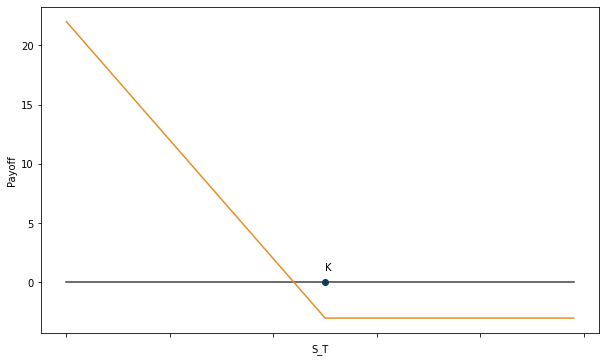

In [15]:
# Simulando o payoff de uma posição long de uma call, considerando o custo inicial
import numpy as np
K = 25
S = list(range(0, 50))
P1 = 3
Payoff_call_long = np.array([max(K - x, 0) for x in S]) - P1

plot_payoff(S, Payoff_call_long, K)

## 2. Estratégias

Vimos como se comporta o valor de uma posição simples com opções, mas as estratégias podem ser mais sofisticadas.

Existem extratégias voltadas para *bull* ou *bear market*, estratégias que podem ser mais ou menos arriscadas.

Vamos ver duas estratégias que são a base de muitas estratégias, os chamados *spreads*.

### 2.1 *Call spread*

Esta estratégia também é chamada de "trava de alta" e funciona com a compra e venda simultânea de *calls*
para *strikes* diferentes. Nesta forma, ela é indicada para um cenário de crescimento da ação.

A vantagem dela em relação a uma compra simples de *call* é a redução do custo total da operação, a desvantagem é a limitação do retorno.

Compra-se uma *call A* com *strike* *K1* (em geral já dentro do dinheiro) por *P1* reais, ao mesmo tempo vende-se uma *call B* com *strike* *K2* (maior que *K1*) por *P2* reais.

Com a venda de *B* ganha-se um prêmio que reduzirá o custo da compra de A.

A venda de B limita o ganho pois ela obrigaria à venda de 1 ação por *K2* reais, mas ter a posição *A* protege esta posição vendida.

O prêmio pago é igual ao custo a *P1 - P2*.

O lucro máximo desta estratégia é: *K2 - K1 - prêmio pago*.

![call spread](Imagens/06_05_call_spread.png)


In [1]:
def plot_payoff_estrategia(S, Payoff, K1=None, K2=None):
    import matplotlib.pyplot as plt
    from matplotlib.ticker import NullFormatter
    orange   = '#e58e26'
    grayblue = '#0a3d62'
    gray     = '#404040'
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(S, [0]*len(S), color=gray)
    ax.plot(S, Payoff, color=orange)
    
    if 'K1':
        ax.plot(K1, 0, 'go', color=grayblue) 
        ax.annotate('K1', xy=(K1, 0))
    if 'K2':
        ax.plot(K2, 0, 'go', color=grayblue) 
        ax.annotate('K2', xy=(K2, 0))
        
    ax.set_xlabel('S_T')
    ax.set_ylabel('Payoff')    
    ax.xaxis.set_major_formatter(NullFormatter())
    #ax.yaxis.set_major_formatter(NullFormatter())
    plt.show()    
    #fig.savefig(path_out + 'Payoff.png', format='png')
    plt.close()
    return

In [ ]:
# Simulando o payoff de uma call spread
import numpy as np
K=None
K1 = 22
K2 = 26
S = list(range(0, 50))
P1 = 3
P2 = 2

payoff_call_A = [max(x - K1, 0) for x in S]
payoff_call_B = [max(x - K2, 0) for x in S]
Payoff_call_spread = np.array(payoff_call_A) - np.array(payoff_call_B) - P1 + P2

plot_payoff(S, payoff_call_A, K=K1)
plot_payoff(S, -np.array(payoff_call_B), K=K2)
plot_payoff_estrategia(S, Payoff_call_spread, K1=K1, K2=K2)


### 2.2 *Put spread*

Esta estratégia também é chamda de "trava de baixa" e funciona de forma semelhante ao *call spread*, sendo indicada para ganhar com a queda de uma ação.

Da mesma maneira que a *call spread*, essa operação é mais barata que uma compra de *put* ao passo que tem seu retorno limitado.

Compra-se uma *put A* com *strike* *K1* (em geral já dentro do dinheiro) por *P1* reais, ao mesmo tempo vende-se uma *put B* com *strike* *K2* (menor que *K1*) por *P2* reais.

O prêmio pago será igual a *P1 - P2*.

O lucro máximo desta estratégia é: *K2 - K1 - prêmio pago*.

![put spread](Imagens/06_06_Put_spread.png)


In [ ]:
# Simulando o payoff de uma put spread

K=None
K1 = 22
K2 = 18
S = list(range(0, 50))
P1 = 3
P2 = 2

payoff_put_A = [max(K1 - x, 0) for x in S]
payoff_put_B = [max(K2 - x, 0) for x in S]
Payoff_put_spread = np.array(payoff_put_A) - np.array(payoff_put_B) - P1 + P2

plot_payoff(S, payoff_put_A, K=K1)
plot_payoff(S, -np.array(payoff_put_B), K=K2)
plot_payoff_estrategia(S, Payoff_put_spread, K1=K1, K2=K2)

## Exercícios em aula

1) Construa o payoff das seguintes estratégias:

1. **Lançar uma opção coberta**: É uma estratégia de hede (minimizar riscos). Vende-se uma call e compra-se uma ação.
2. **Straddle comprador**: Estratégia de apostar na alta volatilidade. Compra-se uma call e uma put com o mesmo strike.
3. **Straddle vendedor**: Estratégia para vender volatilidade, acreditando que o mercado ficará estável em torno do strike, sem grandes oscilações. Vende-se uma call e uma put com o mesmo strike.
4. **Box Spread**: Utiliza-se call e put para obter um ganho fixo, qualquer que seja a cotação do ativo-objeto no vencimento. Seu resultado é sempre *K2 - K1*.
    - Compra call com strike K1
    - Vende call com strike K2 > K1
    - Vende put com strike K1
    - Compra put com strike K2
5. **Spread Butterfly**: Envolve posições em opções com 3 strikes diferentes. Leva um lucro se o preço ficar próximo de K2 e um pequeno prejuízo caso contrário. 
    - Compra uma call com K1 (strike baixo)
    - Compra uma call com K3 > K1 (strike alto)
    - Vende duas calls com K2, sendo K1 < K2 < K3 (strike próximo do spot)


2) Qual a diferença entre o straddle vendedor e o butterfly?


In [ ]:
# 1. Opção coberta
K = 25
S = list(range(0, 50))
P1 = 3

In [1]:
# 2. Straddle comprador
K = 25
S = list(range(0, 50))
P1 = 1
P2 = 2

In [2]:
# 3. Straddle vendedor
K = 25
S = list(range(0, 50))
P1 = 1
P2 = 2

In [3]:
# 4. Box spread
K1 = 25
K2 = 28
S = list(range(0, 50))
P1 = 1
P2 = 2

In [ ]:
# 5. Butterfly
# 4. Box spread
K1 = 22
K2 = 26
K3 = 30
S = list(range(0, 50))
P1 = 1
P2 = 3
P3 = 6

## 3. Black & Scholes

O modelo original de Fisher Black e Myrion Scholes foi publicado em artigo em 1973 e estabelecia uma nova forma de precificar opções e de se proteger de seus riscos inerentes. Rober Merton, no mesmo ano, publicou outro artigo, incorporando novos elementos à análise, e consolidando o chamado modelo de Black-Scholes-Merton.

### 3.1. Hipóteses
São hipóteses do modelo de Black-Scholes:

- o preço do ativo-objeto segue um movimento browniano geométrico;
- o ativo-objeto não paga dividendos durante a vigência do contrato da opção;
- não há custos de transação;
- é permitido vender a descobero;
- é permitido negociar continuamente qualquer fração do valor do ativo;
- a taxa livre de risco (*r*) é constante e igual para todos os vencimentos;
- não há oportunidades de arbitragem.

### 3.2. A solução do modelo

As fórmulas de Black-Scholes-Merton para os preços de opções de compra e venda europeias são:

$$  c = S_0 N(d_1) - K e^{-rT} N(d_2) $$

e 

$$ p = K e^{-rT} N(-d_2) - S_0 N(-d_1) $$

Onde:

$$ d_1 = \frac{ ln(S_0/K) + (r + \sigma^2/2) T }{ \sigma \sqrt T} $$

$$ d_2 = \frac{ ln(S_0/K) + (r - \sigma^2/2) T }{ \sigma \sqrt T} = d_1 - \sigma \sqrt T $$

A função *N(x)* é a função de distribuição de probabilidade cumulativa para uma variável com distribuição normal padrão. Em outras palavras, ela é a probabilidade de que uma variável com distribuição normal padrão será menor do que x. A função está ilustrada na figura abaixo. 

- As variáveis *c* e *p* são o preço da opção de compra e da de venda europeias, 
*S_0* é o preço da ação no tempo zero, 
- *K* é o preço de exercício (*strike*), 
- *r* é a taxa de juros livre de risco com capitalização contínua,
- $\sigma$ é a volatilidade do preço da ação e 
- *T* é o tempo até a maturidade da opção.

![Distribuição normal](Imagens/06_07_Dist_Normal.png)


In [ ]:
import numpy as np
from scipy.stats import norm

def calc_BS(S, K, r, T, sigma, tipo):

    return price

In [ ]:
# Exemplo Black-Scholes
S = 25
K = 24
r = 0.10
T = 0.5 # 6 meses
sigma = 0.15

call_price = calc_BS(S, K, r, T, sigma, 'call')
put_price =  calc_BS(S, K, r, T, sigma, 'put')

print(f"Preço da call: {round(call_price, 2)}. \nPreço da put: {round(put_price, 2)}.")

## 4. *Moneyness*

O *moneyness* de uma opção é a posição relativa do preço à vista (*spot*) do ativo subjacente em relação ao *strike* da opção. Esta medida é relacionada ao valor intrínseco da opção, definido como o *payoff* do derivativo caso fosse exercido imediatamente.

Existem três classificações de *moneyness*:

- *In the money* (dentro do dinheiro): quando ela dá lucro se exercida imediatamente;
- *Out the money* (fora do dinheiro): quando ela não daria resultado positivo, se fosse exercida;
- *At the money* (no dinheiro): quando o preço à vista do ativo (*spot*) for igual (ou muito próximo) do *strike* da opção.

In [ ]:
# Calls
call_price_atm = calc_BS(25, 24.5, r, T, sigma, 'call')
call_price_itm = calc_BS(25, 15, r, T, sigma, 'call')
call_price_otm = calc_BS(25, 30, r, T, sigma, 'call')

print(f'ATM: {call_price_atm} \nITM: {call_price_itm} \nOTM: {call_price_otm}')

In [ ]:
# Puts

## 5. Paridade *put-call*

Existe uma relação entre o preço de uma *call* e uma *put* europeias de mesmo *strike* e mesmo vencimento, chamada de **paridade *put-call***. Na prática, isto significa que se sabemos o preço da *call* então podemos obter o preço da *put* correspondente (sobre o mesmo ativo objeto, com mesmo *strike* e mesmo vencimento), e vice-versa. Para chegarmos a essa relação, utilizamos o conceito de não-arbitragem e criamos dois portfólios:

- **Portfólio (1)**: Comprar uma *caall* e vencer uma *put*
- **Portfólio (2)**: Comprar uma unidade do ativo-objeto e tomar *Ke^(-rT)* reais emprestado.

No vencimento *T*, o detentor do portfólio (2) possui uma ação, mas deve pagar *K* reais ao emprestador. Assim, o valor do portfólio (2) no vencimento é:

$$ payoff_2 = S_T - K $$

O detentor do portfólio (1) se depara com duas possibilidadesz:

a) Se no vencimento o preço da opção for maior que o *strike* ($S_T > K$), ele exerce a *call* enquanto sua contraparte na *put* não exerce seu direito, restando:

$$ payoff_{1a} = S_T - K $$

b) Se no vencimento o preço da ação for menor que o *strike* ($S_T < K$), o detentor deixa de exercer sua *call*, mas tem sua *put* exercida pela contraparte, e por isso é obrigado a pagar $K - S_T$, o que faz com que seu resultado seja:

$$ payoff_{1b} = -(K - S_T) = S_T - K $$

Assims, no vencimento *T*, os portfólios (1) e (2) possuem sempre o mesmo valor (*payoff*), a saber: *S_T - K*. Em um contexto de não-arbitragem, os valores destes portfólios têm de ser iguais em qualquer tempo *t*. Isso porque se o portfólio (1), em um dado momento, valesse mais que o portfólio (2), alguém poderia comprar o portfólio (1) e vender o portfólio (2), obtenod lucro no vencimento sem incorrer nenhum risco. Assim, temos que no instante *t*:

$$ c(S,t) - p(S,t) = S - K e^{-rT} $$

# Exercícios

1. Verifique a paridade put-call com os dados do exemplo da seção 3.2.
2. Calcule os preços das calls e puts dos exercícios de estratégias (P1, P2, P3..).
3. Calcule os resultados máximos e mínimos possíveis em cada estratégia.
4. Faça os gráficos do prêmio de uma call em função de possíveis valores de $S$, $r$, $T$ e $\sigma$.
5. Repita para uma put.

Utilize os seguintes dados nos exercícios 4 e 5:

Fixos:
- S = 24
- K = 25
- r = 0.10
- T = 0.5
- $\sigma$ = 0.15

Variáveis:
- S: de 0 a 50
- r: de 0.005 a 0.30
- T: 0.01 a 1.0
- $\sigma$: de 0.01 a 0.50